# The NBD Model
## Write code (for the same dataset) to estimate the parameters of the NBD model using MLE. Report your code, the estimated parameters and the maximum value of the log-likelihood. Evaluate the NBD model vis-à-vis the Poisson model; explain which is better and why. Predict the number of people with 0, ..., 23 exposures based on the NBD model. Explain how the predicted values are obtained using the case of 2 exposures (show your calculations). Graph the original and predicted numbers of exposures.

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

<hr style="border:2px solid black">
<b>Read in the data</b>
<hr style="border:2px solid black">

In [2]:
bbrd = pd.read_csv("billboard.csv")
bbrd.head()

,EXPOSURES,PEOPLE
0,0,48
1,1,37
2,2,30
3,3,24
4,4,20


<hr style="border:2px solid black">
<b>Define the funtions needed</b><br>
<b>1. the log-likelihood</b>
<hr style="border:2px solid black">

In [3]:
def log_likelihood_nbd(params, exposures, people):
    shape_n, alpha = params
    
    prob = []
    prob_t =[]
    #probSum = 0
    
# need to consider all periods
    pds = list(range(0, len(exposures)))
    for i in pds:
        if i == 0:
            prob.append((alpha/(alpha+1))**shape_n)
            prob_t.append(people[i]*np.log(prob[i]))
            #probSum += prob_t[i]
        else:
            prob.append(prob[i-1]*((shape_n)+(exposures[i])-1)/(exposures[i]*((alpha)+1)))
            prob_t.append(people[i]*np.log(prob[i]))
            #probSum += prob_t[i]
        
    return sum(prob_t)

<hr style="border:2px solid black">
<b>2. the negative of the log-likelihood</b>
<hr style="border:2px solid black">

In [4]:
def neg_log_likelihood_nbd(params, exposures, people):
    return(-np.sum(log_likelihood_nbd(params, exposures, people)))

<hr style="border:2px solid black">
<b>Specify the information needed for the optimizer</b>
<hr style="border:2px solid black">

In [5]:
exposures = bbrd.EXPOSURES
people = bbrd.PEOPLE
params = np.array((1,0.5))
print(log_likelihood_nbd(params, exposures, people))
print('neg:', neg_log_likelihood_nbd(params, exposures, people))


-726.3412025995224
neg: 726.3412025995224


<hr style="border:2px solid black">
<b>Call the optimizer</b>
<hr style="border:2px solid black">

In [6]:
result_nbd_final = minimize(
    neg_log_likelihood_nbd, 
    [1, 0.5],  # Inline initial guess
    args=(exposures, people), 
    bounds=((1e-5, None), (1e-5, 1-1e-5))  # Inline bounds
)

<hr style="border:2px solid black">
<b>Review the result</b>
<hr style="border:2px solid black">

In [7]:
result_nbd_final

      fun: 649.6888274836747
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.82121023e-05, -2.04636308e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 39
      nit: 10
     njev: 13
   status: 0
  success: True
        x: array([0.96925989, 0.21751787])

<hr style="border:2px solid black">
<b>Get shape_n and alpha</b>
<hr style="border:2px solid black">

In [8]:
shape_n = result_nbd_final.x[0]
alpha = result_nbd_final.x[1]

In [9]:
shape_n, alpha

(0.9692598923599475, 0.2175178724561678)

<b>The estimated parameters for the Negative Binomial Distribution (NBD) model are: shape_n is 0.969 and alpha is 0.217, and with the maximum value of the log-likelihood being approximately -649.689.<b>

<hr style="border:2px solid black">
<b>Define a function to make predictions</b>
<hr style="border:2px solid black">

In [10]:
def predict(shape_n, alpha, exposures, predTo, predC):
    pds = list(range(0, predTo))
    prob=[]
    for i in pds:
        if i == 0:
            predC[i] =(((alpha/(alpha+1))**shape_n)*np.sum(people))
            prob.append((alpha/(alpha+1))**shape_n)
        else:
                predC[i] = (prob[i-1]*((shape_n)+(exposures[i])-1)/(exposures[i]*((alpha)+1)))*np.sum(people)
                prob.append(prob[i-1]*((shape_n)+(exposures[i])-1)/(exposures[i]*((alpha)+1)))

                


<hr style="border:2px solid black">
<b>Make predictions</b>
<hr style="border:2px solid black">

In [11]:
predTo = len(bbrd.PEOPLE)

In [12]:
predC = np.zeros(predTo)

In [13]:
predict(shape_n, alpha, exposures, predTo, predC)

In [14]:
predC

array([47.09259345, 37.49017825, 30.31902285, 24.64715592, 20.08819946,
       16.39786752, 13.39927393, 10.95707264,  8.96493611,  7.33813931,
        6.00860321,  4.92133378,  4.03174937,  3.30361952,  2.70744747,
        2.21918631,  1.81921163,  1.4914952 ,  1.22293732,  1.00282613,
        0.82239842,  0.67448257,  0.55320759,  0.453766  ])

<b>The predicted number of people with 2 exposures, based on the NBD model estimated is at approximately 30.319. <b>

<hr style="border:2px solid black">
<b>Plot the actual values and predictions</b>
<hr style="border:2px solid black">

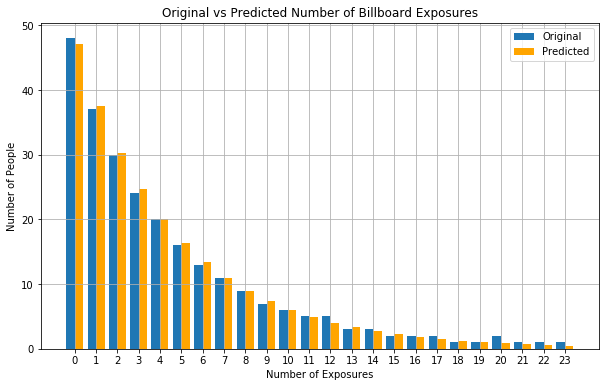

In [15]:
import matplotlib.pyplot as plt

# Plot the original and the predicted number of exposures
plt.figure(figsize=(10, 6))
plt.bar(exposures - 0.2, people, width=0.4, label='Original', align='center')
plt.bar(exposures + 0.2, predC, width=0.4, label='Predicted', align='center', color='orange')
plt.xlabel('Number of Exposures')
plt.ylabel('Number of People')
plt.title('Original vs Predicted Number of Billboard Exposures')
plt.xticks(exposures)
plt.legend()
plt.grid(True)
plt.show()